## Import Libraries



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

## Get the Data

Set index_col=0 to use the first column as the index.

In [2]:
df = pd.read_csv("loan_data.csv",index_col=0)

In [3]:
df.head()

,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,,,,,,,,,,,,,
1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9578 entries, 1 to 0
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   purpose            9578 non-null   object 
 1   int.rate           9578 non-null   float64
 2   installment        9578 non-null   float64
 3   log.annual.inc     9578 non-null   float64
 4   dti                9578 non-null   float64
 5   fico               9578 non-null   int64  
 6   days.with.cr.line  9578 non-null   float64
 7   revol.bal          9578 non-null   int64  
 8   revol.util         9578 non-null   float64
 9   inq.last.6mths     9578 non-null   int64  
 10  delinq.2yrs        9578 non-null   int64  
 11  pub.rec            9578 non-null   int64  
 12  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 1.0+ MB


In [5]:
df.describe()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
cat_feats = ['purpose']

In [7]:
df= pd.get_dummies(df,columns=cat_feats,drop_first=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9578 entries, 1 to 0
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   int.rate                    9578 non-null   float64
 1   installment                 9578 non-null   float64
 2   log.annual.inc              9578 non-null   float64
 3   dti                         9578 non-null   float64
 4   fico                        9578 non-null   int64  
 5   days.with.cr.line           9578 non-null   float64
 6   revol.bal                   9578 non-null   int64  
 7   revol.util                  9578 non-null   float64
 8   inq.last.6mths              9578 non-null   int64  
 9   delinq.2yrs                 9578 non-null   int64  
 10  pub.rec                     9578 non-null   int64  
 11  not.fully.paid              9578 non-null   int64  
 12  purpose_credit_card         9578 non-null   bool   
 13  purpose_debt_consolidation  9578 non-null

In [9]:
bool_cols = df.select_dtypes(include=bool)

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in bool_cols:
    df[i] = label_encoder.fit_transform(df[i])


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9578 entries, 1 to 0
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   int.rate                    9578 non-null   float64
 1   installment                 9578 non-null   float64
 2   log.annual.inc              9578 non-null   float64
 3   dti                         9578 non-null   float64
 4   fico                        9578 non-null   int64  
 5   days.with.cr.line           9578 non-null   float64
 6   revol.bal                   9578 non-null   int64  
 7   revol.util                  9578 non-null   float64
 8   inq.last.6mths              9578 non-null   int64  
 9   delinq.2yrs                 9578 non-null   int64  
 10  pub.rec                     9578 non-null   int64  
 11  not.fully.paid              9578 non-null   int64  
 12  purpose_credit_card         9578 non-null   int64  
 13  purpose_debt_consolidation  9578 non-null

In [12]:
df.mean()

int.rate                          0.122640
installment                     319.089413
log.annual.inc                   10.932117
dti                              12.606679
fico                            710.846314
days.with.cr.line              4560.767197
revol.bal                     16913.963876
revol.util                       46.799236
inq.last.6mths                    1.577469
delinq.2yrs                       0.163708
pub.rec                           0.062122
not.fully.paid                    0.160054
purpose_credit_card               0.131760
purpose_debt_consolidation        0.413134
purpose_educational               0.035811
purpose_home_improvement          0.065671
purpose_major_purchase            0.045625
purpose_small_business            0.064627
dtype: float64

<Axes: >

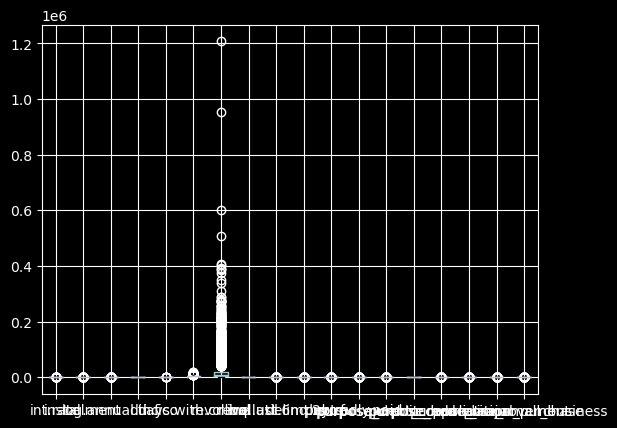

In [13]:
df.boxplot()

In [14]:
# Replacing Outliers
def replace_outliers(df, column_name):
    # Calculateing the 5th and 95th percentiles
    for i in column_name:
        lower_bound = df[i].quantile(0.05)
        upper_bound = df[i].quantile(0.95)
        
        # Replace values below the 5th percentile with the 5th percentile value
        df[i] = df[i].apply(lambda x: lower_bound if x < lower_bound else x)
        
        # Replace values above the 95th percentile with the 95th percentile value
        df[i] = df[i].apply(lambda x: upper_bound if x > upper_bound else x)
    
    return df

In [15]:
replace_outliers(df, df.columns)

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
credit.policy,,,,,,,,,,,,,,,,,,
1,0.1189,756.2655,11.350407,19.48,737.0,5639.958333,28854.0,52.1,0.0,0.0,0.0,0,0,1,0.0,0,0.0,0
1,0.1071,228.2200,11.082143,14.29,707.0,2760.000000,33623.0,76.7,0.0,0.0,0.0,0,1,0,0.0,0,0.0,0
1,0.1357,366.8600,10.373491,11.63,682.0,4710.000000,3511.0,25.6,1.0,0.0,0.0,0,0,1,0.0,0,0.0,0
1,0.1008,162.3400,11.350407,8.10,712.0,2699.958333,33667.0,73.2,1.0,0.0,0.0,0,0,1,0.0,0,0.0,0
1,0.1426,102.9200,11.299732,14.97,667.0,4066.000000,4740.0,39.5,0.0,1.0,0.0,0,1,0,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.1461,344.7600,11.918391,10.39,672.0,9329.958333,57654.3,82.1,2.0,0.0,0.0,1,0,0,0.0,0,0.0,0
0,0.1253,257.7000,11.141862,1.27,722.0,4380.000000,184.0,1.1,5.0,0.0,0.0,1,0,0,0.0,0,0.0,0
0,0.1071,97.8100,10.596635,13.09,687.0,3450.041667,10036.0,82.9,5.0,0.0,0.0,1,0,1,0.0,0,0.0,0


<Axes: >

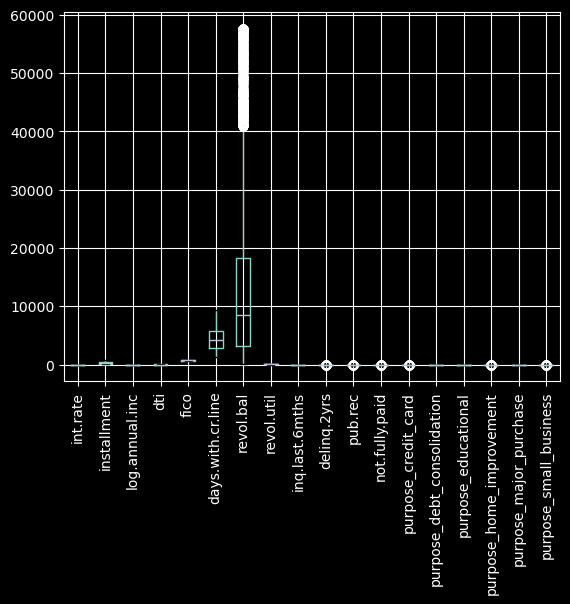

In [16]:
df.boxplot(rot=90)

In [17]:
X = df.drop('not.fully.paid',axis=1)
y = df['not.fully.paid']

## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [18]:
scaler = StandardScaler()

In [19]:
scaler.fit(X)

StandardScaler()

In [20]:
X_scaled = scaler.transform(X)

In [21]:
X_scaled = pd.DataFrame(X_scaled,columns=df.columns[:-1])
X_scaled.head()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase
0,-0.127079,2.245844,0.791888,1.035739,0.735721,0.533243,1.000615,0.189072,-0.904980,-0.363894,-0.248958,-0.389558,1.191856,0.0,-0.265117,0.0,-0.262855
1,-0.596434,-0.448021,0.286209,0.258122,-0.100108,-0.788356,1.317322,1.047421,-0.904980,-0.363894,-0.248958,2.567010,-0.839028,0.0,-0.265117,0.0,-0.262855
2,0.541155,0.259261,-1.049602,-0.140425,-0.796632,0.106489,-0.682399,-0.735572,-0.263009,-0.363894,-0.248958,-0.389558,1.191856,0.0,-0.265117,0.0,-0.262855
3,-0.847022,-0.784113,0.791888,-0.669324,0.039197,-0.815909,1.320244,0.925299,-0.263009,-0.363894,-0.248958,-0.389558,1.191856,0.0,-0.265117,0.0,-0.262855
4,0.815609,-1.087249,0.696366,0.360006,-1.214547,-0.189039,-0.600782,-0.250570,-0.904980,2.748051,-0.248958,2.567010,-0.839028,0.0,-0.265117,0.0,-0.262855


## Train Test Split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,
                                                    test_size=0.30)

## Using KNN

In [23]:
knn = KNeighborsClassifier(n_neighbors=3)

In [24]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [25]:
pred = knn.predict(X_test)

## Predictions and Evaluations

In [26]:
print(confusion_matrix(y_test,pred))

[[2270  147]
 [ 410   47]]


In [27]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      2417
           1       0.24      0.10      0.14       457

    accuracy                           0.81      2874
   macro avg       0.54      0.52      0.52      2874
weighted avg       0.75      0.81      0.77      2874



## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [28]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

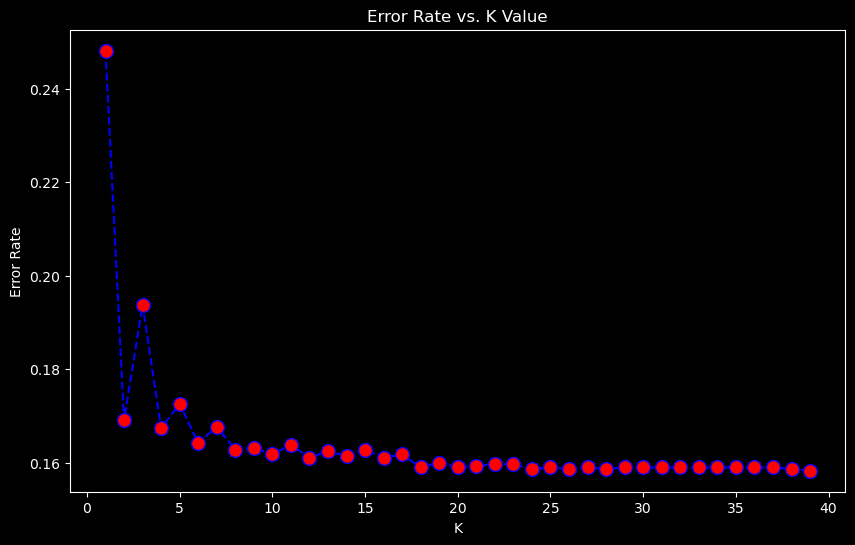

In [29]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after arouns K>12 the error rate just have less Let's retrain the model with that and check the classification report!

In [30]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=3
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=3


[[2270  147]
 [ 410   47]]


              precision    recall  f1-score   support

           0       0.85      0.94      0.89      2417
           1       0.24      0.10      0.14       457

    accuracy                           0.81      2874
   macro avg       0.54      0.52      0.52      2874
weighted avg       0.75      0.81      0.77      2874



In [31]:
# NOW WITH K=13
knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=13')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=13


[[2399   18]
 [ 449    8]]


              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2417
           1       0.31      0.02      0.03       457

    accuracy                           0.84      2874
   macro avg       0.58      0.51      0.47      2874
weighted avg       0.76      0.84      0.77      2874



- The overall accuracy is higher for 
𝐾=13
K=13 (0.83) 
- 𝐾=3
K=3 (0.79), 
- but both models exhibit significant challenges in accurately predicting Class 1, as shown by low precision and recall values for that class.

# Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
dtree = DecisionTreeClassifier()

In [34]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [35]:
predictions = dtree.predict(X_test)

In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2417
           1       0.19      0.22      0.20       457

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.74      0.73      0.73      2874



The model exhibits strong performance in identifying Class 0 (high precision and recall), but it significantly struggles with Class 1, resulting in low precision, recall, and F1-score for that class. The overall accuracy of 0.72 suggests that while the model is somewhat effective, improvements are needed, particularly for Class 

In [37]:
print(confusion_matrix(y_test,predictions))

[[1991  426]
 [ 358   99]]


Ploting Decision Tree

In [38]:
clf = DecisionTreeClassifier(criterion='gini', random_state=0,min_samples_split=3)

In [39]:
pd.DataFrame({'features':dtree.feature_names_in_, 'importance':dtree.feature_importances_})

,features,importance
0,int.rate,0.116263
1,installment,0.136886
2,log.annual.inc,0.112783
3,dti,0.120492
4,fico,0.069829
5,days.with.cr.line,0.114651
6,revol.bal,0.119986
7,revol.util,0.103991
8,inq.last.6mths,0.041678
9,delinq.2yrs,0.011475


[Text(0.4313171829492397, 0.9838709677419355, 'int.rate <= -1.147\ngini = 0.269\nsamples = 6704\nvalue = [5628, 1076]\nclass = N'),
 Text(0.041112156742369475, 0.9516129032258065, 'log.annual.inc <= -1.521\ngini = 0.098\nsamples = 1167\nvalue = [1107, 60]\nclass = N'),
 Text(0.010985859744497983, 0.9193548387096774, 'dti <= -1.688\ngini = 0.282\nsamples = 100\nvalue = [83, 17]\nclass = N'),
 Text(0.005169816350351992, 0.8870967741935484, 'int.rate <= -1.649\ngini = 0.5\nsamples = 14\nvalue = [7, 7]\nclass = N'),
 Text(0.003101889810211195, 0.8548387096774194, 'installment <= -1.203\ngini = 0.278\nsamples = 6\nvalue = [1, 5]\nclass = Y'),
 Text(0.0020679265401407966, 0.8225806451612904, 'inq.last.6mths <= 1.021\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = N'),
 Text(0.0010339632700703983, 0.7903225806451613, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = N'),
 Text(0.003101889810211195, 0.7903225806451613, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Y'),
 Text(0.0041358530

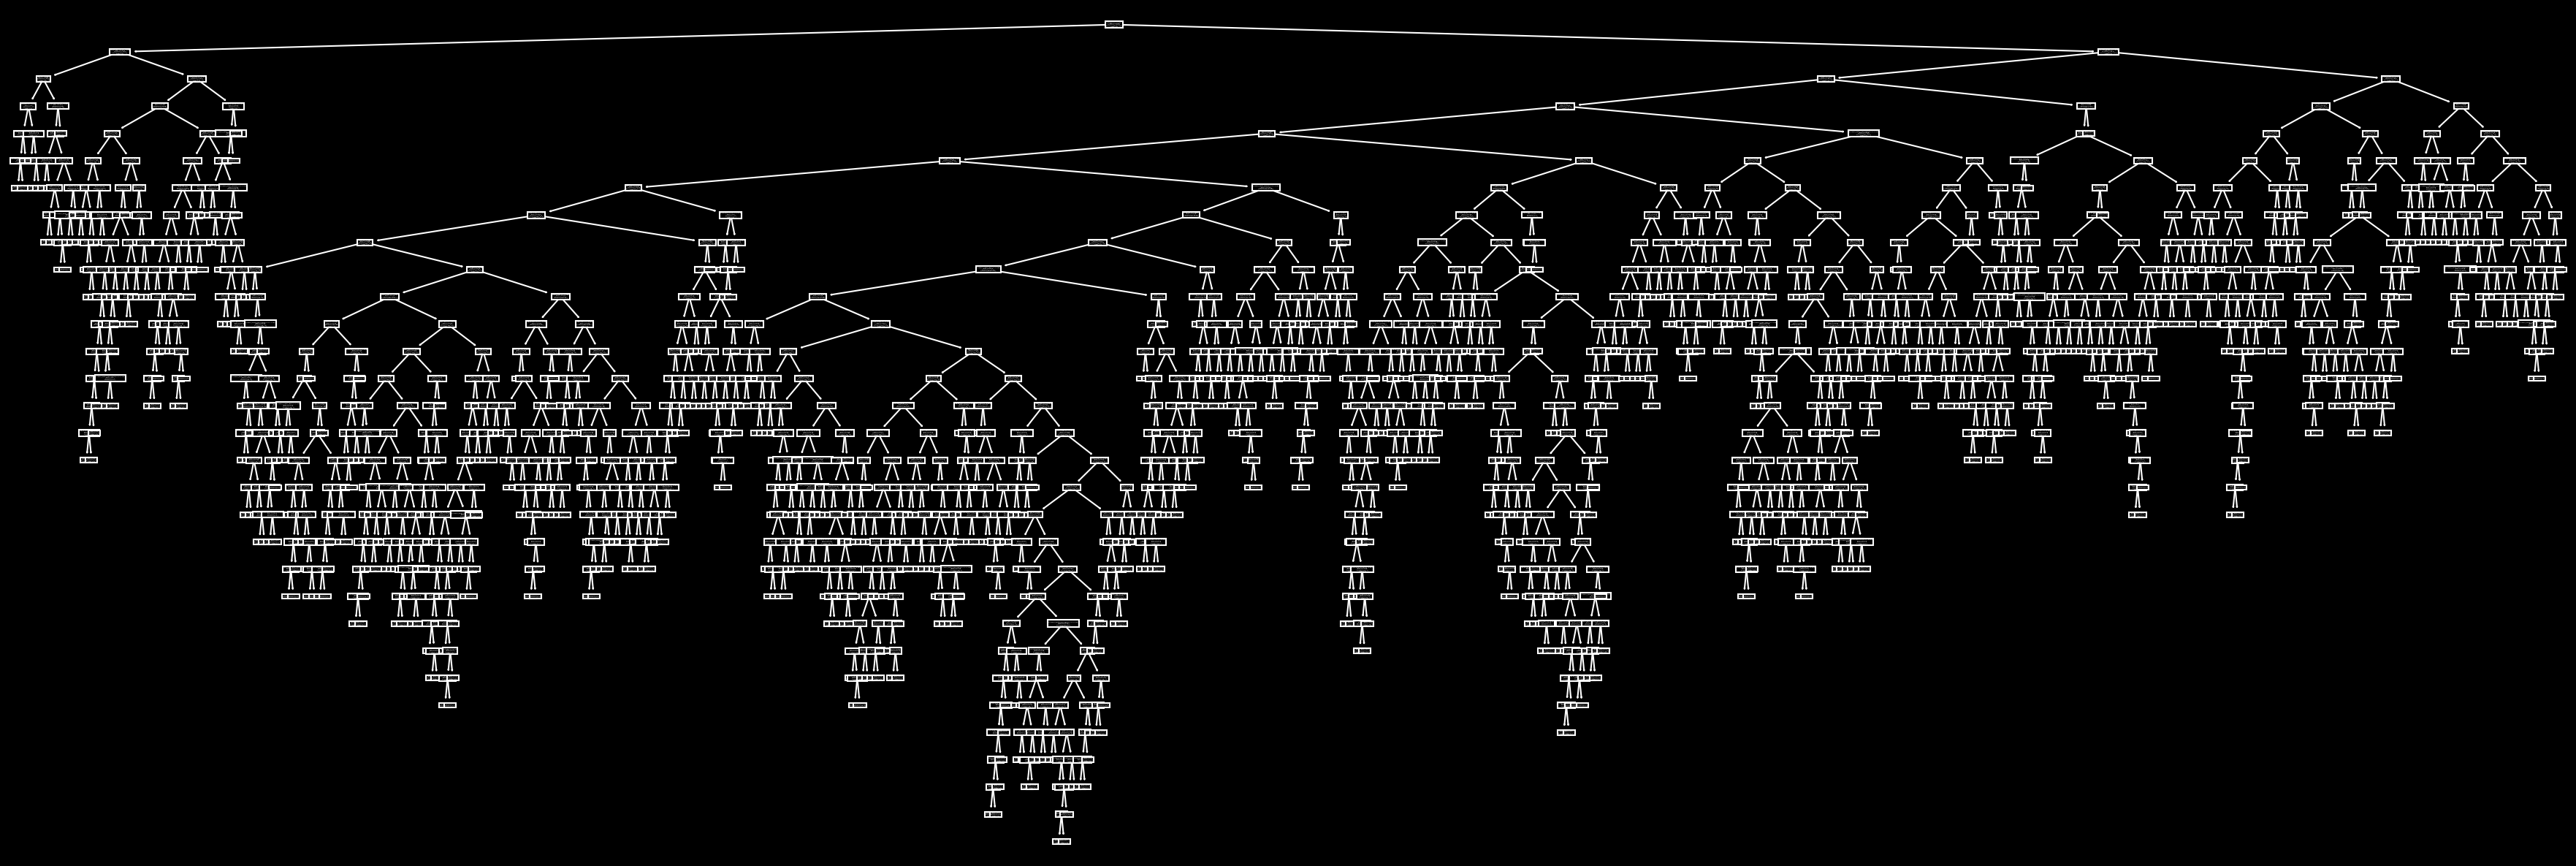

In [40]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,10), dpi=150)
plot_tree(dtree, feature_names=X.columns, class_names=['N','Y'])

# Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [42]:
predictions = logmodel.predict(X_test)

In [43]:
from sklearn.metrics import classification_report

In [44]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2417
           1       0.47      0.02      0.04       457

    accuracy                           0.84      2874
   macro avg       0.66      0.51      0.48      2874
weighted avg       0.78      0.84      0.77      2874



In [45]:
X_test

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase
6768,0.954824,-1.119797,-1.908405,-1.412480,-1.075242,2.226566,-0.868479,-0.829781,-0.904980,-0.363894,-0.248958,-0.389558,-0.839028,0.0,-0.265117,0.0,-0.262855
950,-0.596434,-1.113318,-0.525194,0.638690,-0.657328,-0.967326,-0.323788,0.234432,0.378963,2.748051,-0.248958,-0.389558,1.191856,0.0,-0.265117,0.0,-0.262855
5621,0.262724,-0.514138,0.446658,-0.221333,-0.657328,1.001335,-0.100918,-0.233124,1.020935,-0.363894,4.016736,-0.389558,-0.839028,0.0,-0.265117,0.0,-0.262855
2942,0.755945,-0.599487,0.791888,-1.190732,-0.657328,-1.132528,-0.489281,-0.041217,-0.904980,-0.363894,-0.248958,-0.389558,1.191856,0.0,-0.265117,0.0,-0.262855
773,-0.469152,1.128009,-0.211367,-1.220698,0.039197,-1.201381,-0.652316,-0.791400,-0.904980,-0.363894,-0.248958,-0.389558,1.191856,0.0,-0.265117,0.0,-0.262855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6870,0.541155,-1.005777,0.135328,0.373491,-0.935937,-0.334031,0.693870,-0.302908,0.378963,2.748051,-0.248958,-0.389558,1.191856,0.0,-0.265117,0.0,-0.262855
8229,-0.596434,-1.179843,-1.908405,-1.692662,-0.796632,-1.449146,-0.896503,-0.627406,1.662906,-0.363894,-0.248958,-0.389558,-0.839028,0.0,-0.265117,0.0,-0.262855
6373,0.401940,0.456947,-1.423835,-1.328575,1.571550,-0.334031,-0.596200,-0.117979,-0.904980,-0.363894,-0.248958,-0.389558,1.191856,0.0,-0.265117,0.0,-0.262855
1339,-0.246407,-0.348898,1.387734,-0.101470,-0.657328,-0.719522,0.783722,0.394936,-0.263009,-0.363894,-0.248958,2.567010,-0.839028,0.0,-0.265117,0.0,-0.262855


In [46]:
X_test['prob'] = logmodel.predict_proba(X_test)[:, 1]
X_test['prob']

6768    0.225763
950     0.111941
5621    0.306963
2942    0.078939
773     0.109357
          ...   
6870    0.127065
8229    0.315292
6373    0.087662
1339    0.080857
3082    0.165088
Name: prob, Length: 2874, dtype: float64

In [47]:
df_ROC = pd.DataFrame(columns=['Threshold', 'TP', 'TN', 'FP', 'FN', 'TPR', 'FPR'])

In [48]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score
for threshold in np.arange(0, 1.1, 0.1):
    y_pred = (X_test['prob'] > threshold).astype(int)
    cm = confusion_matrix(y_test,predictions)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    df_ROC.loc[len(df_ROC)] = pd.Series({'Threshold': threshold, 
                                         'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN, 
                                         'TPR': TPR, 'FPR': FPR, 'auc_score':roc_auc_score(y_test,predictions)})

In [49]:
auc = roc_auc_score(y_test, X_test['prob'])

In [50]:
print(df_ROC)
print('AUC:', auc)

    Threshold   TP      TN    FP     FN       TPR       FPR
0         0.0  9.0  2407.0  10.0  448.0  0.019694  0.004137
1         0.1  9.0  2407.0  10.0  448.0  0.019694  0.004137
2         0.2  9.0  2407.0  10.0  448.0  0.019694  0.004137
3         0.3  9.0  2407.0  10.0  448.0  0.019694  0.004137
4         0.4  9.0  2407.0  10.0  448.0  0.019694  0.004137
5         0.5  9.0  2407.0  10.0  448.0  0.019694  0.004137
6         0.6  9.0  2407.0  10.0  448.0  0.019694  0.004137
7         0.7  9.0  2407.0  10.0  448.0  0.019694  0.004137
8         0.8  9.0  2407.0  10.0  448.0  0.019694  0.004137
9         0.9  9.0  2407.0  10.0  448.0  0.019694  0.004137
10        1.0  9.0  2407.0  10.0  448.0  0.019694  0.004137
AUC: 0.6628612608175678


The model shows very low True Positive Rate (TPR = 0.02) across all thresholds, indicating it struggles to identify positive cases, while maintaining a high True Negative Rate (TN = 2361). The AUC score of 0.663 suggests moderate overall model performance, but improvements are needed for better discrimination between classes.

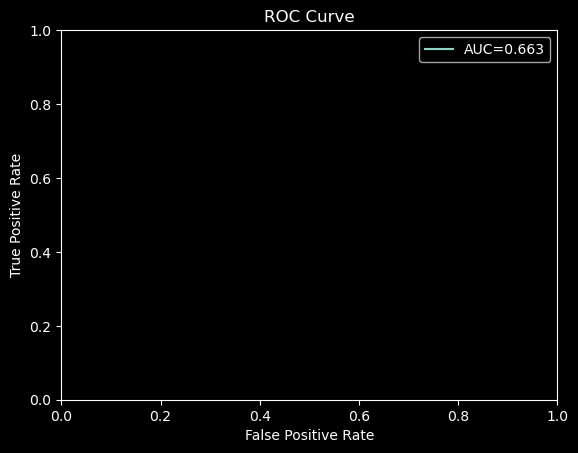

In [51]:
plt.plot(df_ROC['FPR'], df_ROC['TPR'], label=f'AUC={auc:.3f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend()
plt.show()